In [90]:
from math import inf
import numpy as np
fh = open("small.txt", "r")
# Load dataset
dataset = [[*x.strip()] for x in fh.readlines()]

# Find start and end locations:
start = (0, dataset[0].index("."))
end = (len(dataset)-1, dataset[-1].index("."))

# numpy:
dataset = np.array(dataset)

directions = [(1,0), (-1,0), (0,1), (0,-1)]
directions_dict = {"." : directions,
                   "^" : [(-1, 0)],
                   "v" : [(1, 0)],
                   "<" : [(0, -1)],
                   ">" : [(0, 1)],
                   }

def bounds(node, maze):
    if 0 <= node[0] < len(maze) and 0 <= node[1] < len(maze[0]):
        return True
    return False

def poi(start, end, dataset):
    """
    Loop through all cells in the maze and find locations
    with more than one neighbour
    """
    points_of_interest = [start, end]
    for r, row in enumerate(dataset):
        for c, cell in enumerate(row):
            if cell == "#":
                continue
            node = (r,c)
            neighbours = 0
            for dir in directions_dict[cell]:
                next_node = (node[0] + dir[0], node[1] + dir[1])
                if bounds(next_node, dataset) and dataset[next_node] != "#":
                    neighbours += 1
            if neighbours > 2:
                points_of_interest.append((r,c))
    return points_of_interest

def maze_to_graph(points_of_interest, dataset):
    graph = dict()
    for node in points_of_interest:
        graph[node] = {}

    # Basically do a BFS to find the next node and edge length:
    for point in points_of_interest:
        queue = [(point, 0)]
        visited = set()

        while queue:
            # Point and length
            p, l = queue.pop(0)
            # Only add the interesting bits:
            if l != 0 and p in points_of_interest and point != p:
                graph[point][p] = l
                continue

            # Traverse the maze:
            for dir in directions_dict[dataset[p]]:
                next_point = (p[0] + dir[0], p[1] + dir[1])
                if bounds(next_point, dataset) and dataset[next_point] != "#":
                    if next_point not in visited:
                        queue.append((next_point, l+1))
                        visited.add(next_point)
    return graph

# Find points of interest:
points_of_interest = poi(start, end, dataset)

# Maze to graph:
graph = maze_to_graph(points_of_interest, dataset)

# Depth first search using the graph:
visited = set()
def dfs(point):
    if point == end:
        return 0
    
    max_path = -inf

    # Avoid cyclic behaviour:
    visited.add(point)
    for next_point in graph[point]:
        if next_point not in visited:
            max_path = max(max_path, dfs(next_point) + graph[point][next_point])
    visited.remove(point)

    return max_path
print(dfs(start))

94


In [89]:
dataset2 = dataset.copy()
letters = "ABCDEFGHIHJKLMNOP"
letters_dict = {start : "start", end : "end"}
i = 0
for node in graph:
    if node not in letters_dict:
        letters_dict[node] = letters[i]
        i+=1
for node in graph:
    for key in graph[node]:
        if key not in letters_dict:
            letters_dict[key] = letters[i]
            i+=1
        print(f"\"{letters_dict[node]}:{node}\" -> \"{letters_dict[key]}:{key}\"")
    dataset2[node] = letters_dict[node]

"start:(0, 1)" -> "B:(5, 3)"
"A:(3, 11)" -> "E:(13, 13)"
"A:(3, 11)" -> "C:(11, 21)"
"B:(5, 3)" -> "D:(13, 5)"
"B:(5, 3)" -> "A:(3, 11)"
"C:(11, 21)" -> "G:(19, 19)"
"D:(13, 5)" -> "E:(13, 13)"
"D:(13, 5)" -> "F:(19, 13)"
"E:(13, 13)" -> "F:(19, 13)"
"E:(13, 13)" -> "C:(11, 21)"
"F:(19, 13)" -> "G:(19, 19)"
"G:(19, 19)" -> "end:(22, 21)"


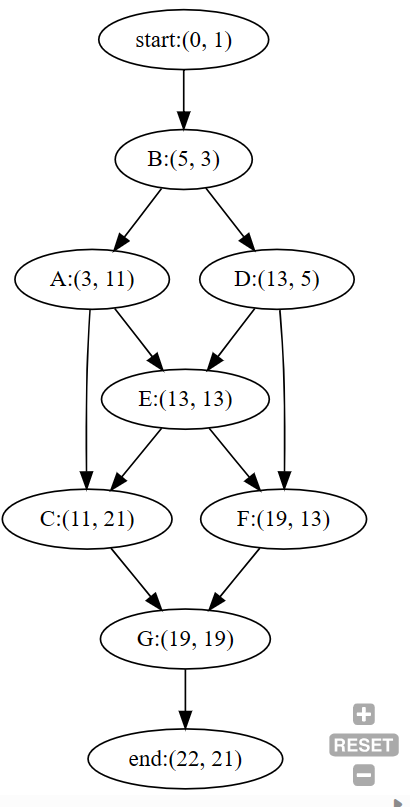

In [80]:
for row in dataset2:
    print("".join(row))

#s#####################
#.......#########...###
#######.#########.#.###
###.....#.>A>.###.#.###
###v#####.#v#.###.#.###
###B>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>C#
#.#.#v#######v###.###v#
#...#D>.#...>E>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>F>.#.>G###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################e#


In [98]:
from math import inf
import numpy as np
fh = open("small.txt", "r")
# Load dataset
dataset = [[*x.strip()] for x in fh.readlines()]

# Find start and end locations:
start = (0, dataset[0].index("."))
end = (len(dataset)-1, dataset[-1].index("."))

# numpy:
dataset = np.array(dataset)

directions = [(1,0), (-1,0), (0,1), (0,-1)]
directions_dict = {"." : directions,
                   "^" : [(-1, 0)],
                   "v" : [(1, 0)],
                   "<" : [(0, -1)],
                   ">" : [(0, 1)],
                   }

def bounds(node, maze):
    if 0 <= node[0] < len(maze) and 0 <= node[1] < len(maze[0]):
        return True
    return False

def poi(start, end, dataset):
    """
    Loop through all cells in the maze and find locations
    with more than one neighbour
    """
    points_of_interest = [start, end]
    for r, row in enumerate(dataset):
        for c, cell in enumerate(row):
            if cell == "#":
                continue
            node = (r,c)
            neighbours = 0
            for dir in directions_dict[cell]:
                next_node = (node[0] + dir[0], node[1] + dir[1])
                if bounds(next_node, dataset) and dataset[next_node] != "#":
                    neighbours += 1
            if neighbours > 2:
                points_of_interest.append((r,c))
    return points_of_interest

def maze_to_graph(points_of_interest, dataset):
    graph = dict()
    for node in points_of_interest:
        graph[node] = {}

    # Basically do a BFS to find the next node and edge length:
    for point in points_of_interest:
        queue = [(point, 0)]
        visited = set()

        while queue:
            # Point and length
            p, l = queue.pop(0)
            # Only add the interesting bits:
            if l != 0 and p in points_of_interest and point != p:
                graph[point][p] = l
                continue

            # Traverse the maze:
            for dir in directions:
                next_point = (p[0] + dir[0], p[1] + dir[1])
                if bounds(next_point, dataset) and dataset[next_point] != "#":
                    if next_point not in visited:
                        queue.append((next_point, l+1))
                        visited.add(next_point)
    return graph

# Find points of interest:
points_of_interest = poi(start, end, dataset)

# Maze to graph:
graph = maze_to_graph(points_of_interest, dataset)

# Depth first search using the graph:
visited = set()
def dfs(point):
    if point == end:
        return 0
    
    max_path = -inf

    # Avoid cyclic behaviour:
    visited.add(point)
    for next_point in graph[point]:
        if next_point not in visited:
            max_path = max(max_path, dfs(next_point) + graph[point][next_point])
    visited.remove(point)

    return max_path
print(dfs(start))

154


In [99]:
dataset2 = dataset.copy()
letters = "ABCDEFGHIHJKLMNOP"
letters_dict = {start : "start", end : "end"}
i = 0
for node in graph:
    if node not in letters_dict:
        letters_dict[node] = letters[i]
        i+=1
for node in graph:
    for key in graph[node]:
        if key not in letters_dict:
            letters_dict[key] = letters[i]
            i+=1
        print(f"\"{letters_dict[node]}:{node}\" -> \"{letters_dict[key]}:{key}\"")
    dataset2[node] = letters_dict[node]

"start:(0, 1)" -> "B:(5, 3)"
"end:(22, 21)" -> "G:(19, 19)"
"A:(3, 11)" -> "B:(5, 3)"
"A:(3, 11)" -> "E:(13, 13)"
"A:(3, 11)" -> "C:(11, 21)"
"B:(5, 3)" -> "start:(0, 1)"
"B:(5, 3)" -> "D:(13, 5)"
"B:(5, 3)" -> "A:(3, 11)"
"C:(11, 21)" -> "G:(19, 19)"
"C:(11, 21)" -> "E:(13, 13)"
"C:(11, 21)" -> "A:(3, 11)"
"D:(13, 5)" -> "E:(13, 13)"
"D:(13, 5)" -> "B:(5, 3)"
"D:(13, 5)" -> "F:(19, 13)"
"E:(13, 13)" -> "F:(19, 13)"
"E:(13, 13)" -> "D:(13, 5)"
"E:(13, 13)" -> "C:(11, 21)"
"E:(13, 13)" -> "A:(3, 11)"
"F:(19, 13)" -> "E:(13, 13)"
"F:(19, 13)" -> "G:(19, 19)"
"F:(19, 13)" -> "D:(13, 5)"
"G:(19, 19)" -> "end:(22, 21)"
"G:(19, 19)" -> "C:(11, 21)"
"G:(19, 19)" -> "F:(19, 13)"


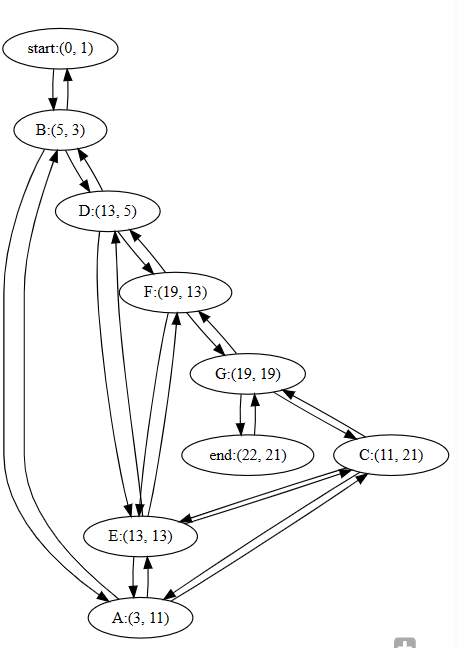

In [100]:
for row in dataset2:
    print("".join(row))

#s#####################
#.......#########...###
#######.#########.#.###
###.....#.>A>.###.#.###
###v#####.#v#.###.#.###
###B>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>C#
#.#.#v#######v###.###v#
#...#D>.#...>E>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>F>.#.>G###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################e#
